# Motor DC
Dadas las ecuaciones del motor de corriente continua con torque de carga $ T_L $ no nulo, con los parámetros

$ LAA=366e10-6; J=5e10-9; RA=55,6; B=0; Ki= 6,49e10-3 ; Km= 6,53e10-3 $

Modelado por las siguientes Ecuaciones diferenciales:

$\frac{di_a}{dt}=\frac{R_A}{L_{AA}}ia-\frac{K_m}{L_{AA}}\omega _r+\frac{1}{L_{AA}}Va $

$ \frac{d\omega_r}{dt}=\frac{K_i}{J}ia-\frac{B_m}{J}\omega _r+\frac{1}{J}T_L $

$ \frac{d\theta _t}{dt}=\omega _r $


En primer lugar, haciendo uso de integracion por euler con el paso fijado integramos para inferir el comportamiento de nuestras variables de interes

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control as ct
from control.matlab import *


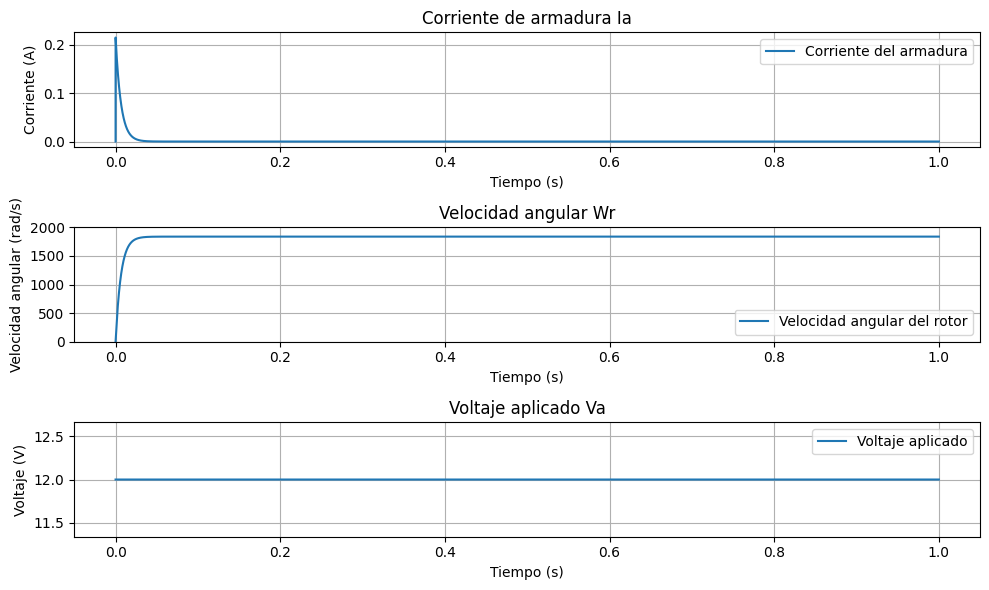

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros del sistema
R_A = 55.6
L_AA = 366e-6
K_m = 6.53e-3
J = 5e-9
B_m = 0
K_i = 6.49e-3

# Definir las matrices A, B, C y D del sistema de espacio de estados
A = np.array([[-R_A/L_AA, -K_m/L_AA],
              [K_i/J, -B_m/J]])
B = np.array([[1/L_AA], [0]])
C = np.array([[1, 0],
              [0, 1]])
D = np.array([[0], [0]])

# Definir la función que calcula la derivada del estado
def derivada_estado(x, u):
    return np.dot(A, x) + np.dot(B, u)

# Definir la función que calcula la salida
def salida(x, u):
    return np.dot(C, x) + np.dot(D, u)

# Definir el tiempo de simulación y el paso de tiempo
tiempo_simulacion = 1.0
delta_t = 10e-7

# Inicializar las variables del sistema
x = np.array([[0], [0]])  # Condiciones iniciales nulas
u = np.array([[12]])      # Voltaje aplicado

# Almacenar resultados de la simulación
tiempos = [0]
corriente_armadura = [x[0, 0]]
velocidad_angular = [x[1, 0]]
voltaje = [u[0, 0]]

# Realizar la simulación mediante el método de Euler
t = 0.0
while t < tiempo_simulacion:
    # Calcular el siguiente estado utilizando el método de Euler
    x = x + derivada_estado(x, u) * delta_t
    
    # Calcular la salida
    y = salida(x, u)
    
    # Almacenar los resultados
    t += delta_t
    tiempos.append(t)
    corriente_armadura.append(y[0, 0])
    velocidad_angular.append(y[1, 0])
    voltaje.append(u[0, 0])

# Graficar las variables de interés
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(tiempos, corriente_armadura, label='Corriente del armadura')
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (A)')
plt.title('Corriente de armadura Ia')
plt.legend()
plt.grid()


plt.subplot(3, 1, 2)
plt.plot(tiempos, velocidad_angular, label='Velocidad angular del rotor')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad angular (rad/s)')
plt.title('Velocidad angular Wr')
y_min = min(velocidad_angular)
plt.ylim(y_min, 2000)
plt.legend()
plt.grid()


plt.subplot(3, 1, 3)
plt.plot(tiempos, voltaje, label='Voltaje aplicado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Voltaje aplicado Va')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Ítem [4] 
Obtener el torque máximo que puede soportar el motor modelado mediante las Ec cuando se lo alimenta con 12V, graficando para 5 segundos de tiempo la velocidad angular y corriente ia para establecer su valor máximo como para dimensionar dispositivos electrónicos.

Para ello podemos  determinarlo a partir de el pico de corriente obtenido a partir de las graficas. Y reemplazar ese valor en la ecuacion

$ T= K_m i_a $

In [28]:
max_Ia = np.max(corriente_armadura)
max_Ia = round(max_Ia, 4)  # Redondear a 4 decimales
print('El valor maximo de la corriente de armadura es de:')
print(max_Ia)

T= K_m*max_Ia
T = round(T, 4)  # Redondear a 4 decimales
print('El valor maximo del torque es de:')
print(T)

El valor maximo de la corriente de armadura es de:
0.2147
El valor maximo del torque es de:
0.0014


El valor maximo de torque que puede soportar el motor para las condiciones dadas es $ 1.41 e-3 N_m $

# Ítem [5] 
A partir de las curvas de mediciones de las variables graficadas se requiere
obtener el modelo del sistema considerando como entrada un escalón de 12V, como salida a la
velocidad angular, y al torque de carga TL aplicado una perturbación. 

En el archivo Curvas_Medidas_Motor.xls están las mediciones, en la primer hoja los valores y en la segunda
los nombres. Se requiere obtener el modelo dinámico, para establecer las constantes del modelo


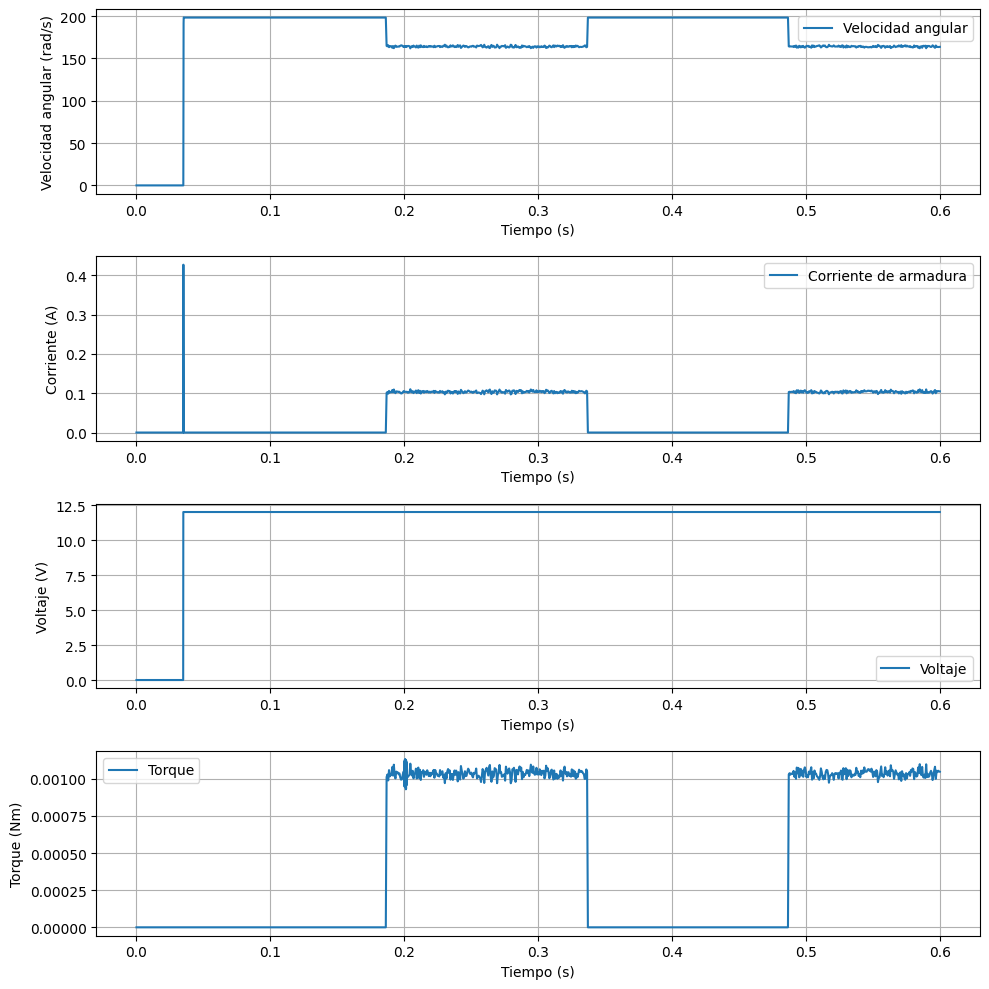

In [30]:
import plotly.graph_objects as go


df= pd.read_excel('Curvas_Medidas_Motor_2024.xls') # extraigo datos de xls
t = df.iloc[:, 0] #selecciono primera columna y todas sus filas, guardo como variable t
W_r = df.iloc[:, 1]
i_a = df.iloc[:, 2]
v=df.iloc[:, 3]
T= df.iloc[:, 4]

# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(4, figsize=(10, 10))

# Graficar velocidad angular en función del tiempo
axs[0].plot(t, W_r, label='Velocidad angular')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Velocidad angular (rad/s)')
axs[0].legend()
axs[0].grid()

# Graficar corriente de armadura en función del tiempo
axs[1].plot(t, i_a, label='Corriente de armadura')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Corriente (A)')
axs[1].legend()
axs[1].grid()

# Graficar voltaje en función del tiempo
axs[2].plot(t, v, label='Voltaje')
axs[2].set_xlabel('Tiempo (s)')
axs[2].set_ylabel('Voltaje (V)')
axs[2].legend()
axs[2].grid()

# Graficar torque en función del tiempo
axs[3].plot(t, T, label='Torque')
axs[3].set_xlabel('Tiempo (s)')
axs[3].set_ylabel('Torque (Nm)')
axs[3].legend()
axs[3].grid()

# Ajustar el layout
plt.tight_layout()
plt.show()

